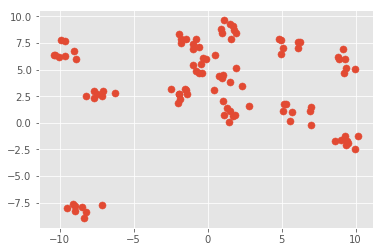

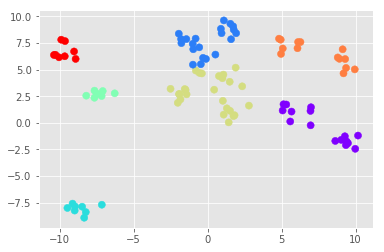

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

x,y = make_blobs(n_samples=100,centers=13,random_state=0,cluster_std=0.6)
plt.scatter(x[:,0],x[:,1],s=50)

plt.show()

est = KMeans(7)
est.fit(x)
y_kmeans = est.predict(x)

plt.scatter(x[:,0],x[:,1],c=y_kmeans, s=50,cmap='rainbow')
plt.show()

[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
[1 0 1 0 1 0]
Coordinate:  [1. 2.]  label:  1
Coordinate:  [5. 8.]  label:  0
Coordinate:  [1.5 1.8]  label:  1
Coordinate:  [8. 8.]  label:  0
Coordinate:  [1.  0.6]  label:  1
Coordinate:  [ 9. 11.]  label:  0


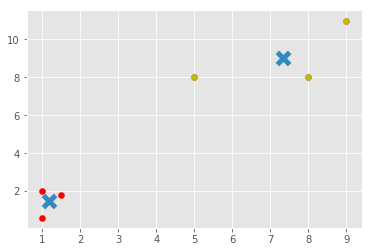

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
%matplotlib inline

x=[1,5,1.5,8,1,9]
y=[2,8,1.8,8,0.6,11]

plt.scatter(x,y)

array = np.array([[1,2],[5,8],[1.5,1.8],[8,8],[1,0.6],[9,11]])
kmeans = KMeans(n_clusters=2)
kmeans.fit(array)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print centroids
print labels

colors = ["y.","r."]

for i in range(len(x)):
    print "Coordinate: ", array[i], " label: ", labels[i]
    plt.plot(array[i][0],array[i][1],colors[labels[i]], markersize=10)
    
plt.scatter(centroids[:,0],centroids[:,1], marker="x",s=150,linewidth=5,zorder=10)
#plt.show()


In [3]:
# To test if you have the nltk package
import nltk
nltk
# If you get error NLTK not found use 
# conda install -c anaconda nltk

<module 'nltk' from 'C:\Users\Milana\AppData\Local\conda\conda\envs\TrainingPy2x\lib\site-packages\nltk\__init__.pyc'>

In [20]:
import collections
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint

def tokenizer(text):
        tokens = word_tokenize(text)
        stemmer = PorterStemmer() 
        tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('english')]
        return tokens


def cluster_sentences(sentences, nb_of_clusters=2): 

        # create tf ifd again: stopwords-> we filter out common words (I,my, the, and...)
        tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('english'),lowercase=True)
        #builds a tf-idf matrix for the sentences
        tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
        kmeans = KMeans(n_clusters=nb_of_clusters)
        kmeans.fit(tfidf_matrix)
        clusters = collections.defaultdict(list)
        for i, label in enumerate(kmeans.labels_):
            clusters[label].append(i)
        return dict(clusters)


if __name__ == "__main__":
        sentences = ["Quantuum physics is quite important in science nowadays.",
                "Software engineering is hotter and hotter topic in the silicon valley",
                "Investing in stocks and trading with them are not that easy",
                "FOREX is the stock market for trading currencies",
                "Warren Buffet is famous for making good investments. He knows stock markets"]
        nclusters= 2
        clusters = cluster_sentences(sentences, nclusters)
        for cluster in range(nclusters):
                print("CLUSTER ",cluster,":")
                for i,sentence in enumerate(clusters[cluster]):
                    print("\tSENTENCE ",i,": ",sentences[sentence])



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Milana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Milana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
('CLUSTER ', 0, ':')
('\tSENTENCE ', 0, ': ', 'Investing in stocks and trading with them are not that easy')
('\tSENTENCE ', 1, ': ', 'FOREX is the stock market for trading currencies')
('\tSENTENCE ', 2, ': ', 'Warren Buffet is famous for making good investments. He knows stock markets')
('CLUSTER ', 1, ':')
('\tSENTENCE ', 0, ': ', 'Quantuum physics is quite important in science nowadays.')
('\tSENTENCE ', 1, ': ', 'Software engineering is hotter and hotter topic in the silicon valley')


In [10]:
# Assignment from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

Automatically created module for IPython interactive environment
n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.43s	69432	0.602	0.650	0.625	0.465	0.598	0.146
random   	0.27s	69694	0.669	0.710	0.689	0.553	0.666	0.147
PCA-based	0.03s	70804	0.671	0.698	0.684	0.561	0.668	0.118
__________________________________________________________________________________


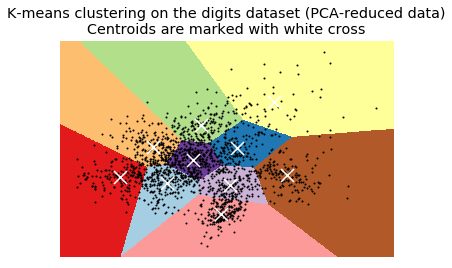

In [5]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()